In [74]:
import pandas as pd
import numpy as np

In [75]:
df_csv = pd.read_csv('./HF_data.csv', encoding = 'utf-8')

print(df_csv)

df_csv.head()

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [76]:
df_csv.shape

(299, 13)

In [77]:
df_csv.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [78]:
df_csv.isnull().count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

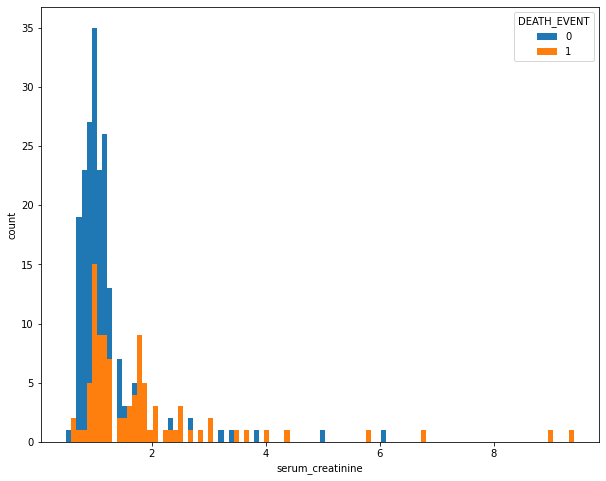

In [124]:
df_csv.loc[:,["serum_creatinine","DEATH_EVENT"]].pivot(columns="DEATH_EVENT", values="serum_creatinine").plot.hist(bins=100,figsize=(10,8))
plt.xlabel('serum_creatinine')
plt.ylabel('count')
plt.show()


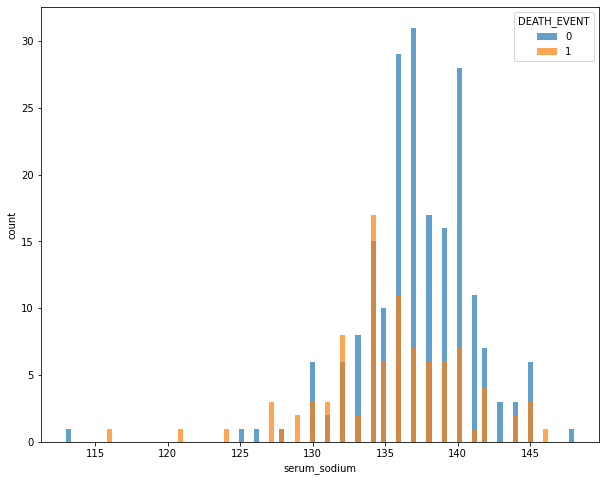

In [127]:
df_csv.loc[:,["serum_sodium","DEATH_EVENT"]].pivot(columns="DEATH_EVENT", values="serum_sodium").plot.hist(bins=100,figsize=(10,8),alpha=0.7)
plt.xlabel('serum_sodium')
plt.ylabel('count')
plt.show()


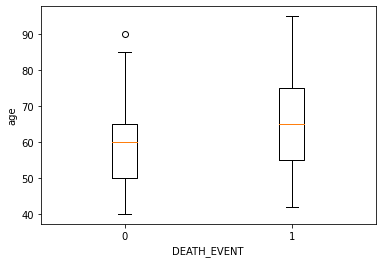

In [135]:
dm = df_csv[df_csv["DEATH_EVENT"] == 0]
dl = df_csv[df_csv["DEATH_EVENT"] == 1]


plt.boxplot([dm['age'], dl['age']], labels = ["0", "1"])


plt.ylabel("age")
plt.xlabel("DEATH_EVENT")
plt.show()


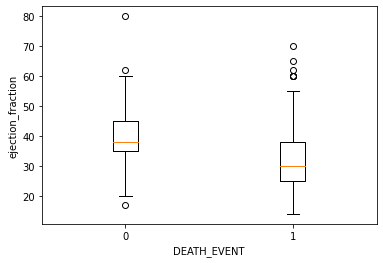

In [136]:
dm = df_csv[df_csv["DEATH_EVENT"] == 0]
dl = df_csv[df_csv["DEATH_EVENT"] == 1]


plt.boxplot([dm['ejection_fraction'], dl['ejection_fraction']], labels = ["0", "1"])


plt.ylabel("ejection_fraction")
plt.xlabel("DEATH_EVENT")
plt.show()


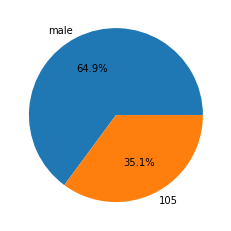

In [133]:
sex=df_csv["sex"]
male = sum(sex)
female = 299-male

ratio=[male,female]
labels=['male',female]
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()


In [79]:
df_csv.groupby('DEATH_EVENT').aggregate(["mean","std"]).stack()

age   anaemia  creatinine_phosphokinase  diabetes  \
DEATH_EVENT                                                                 
0           mean  58.761906  0.408867                540.054187  0.418719   
            std   10.637890  0.492840                753.799572  0.494569   
1           mean  65.215281  0.479167                670.197917  0.416667   
            std   13.214556  0.502188               1316.580640  0.495595   

                  ejection_fraction  high_blood_pressure      platelets  \
DEATH_EVENT                                                               
0           mean          40.266010             0.325123  266657.489901   
            std           10.859963             0.469579   97531.202283   
1           mean          33.468750             0.406250  256381.044792   
            std           12.525303             0.493710   98525.682856   

                  serum_creatinine  serum_sodium       sex   smoking  \
DEATH_EVENT                                                            
0           mean          1.184877    137.216749  0.650246  0.325123   
            std           0.654083      3.982923  0.478071  0.469579   
1           mean          1.835833    135.375000  0.645833  0.312500   
            std           1.468562      5.001579  0.480771  0.465946   

                        time  
DEATH_EVENT                   
0           mean  158.339901  
            std    67.742872  
1           mean   70.885417  
            std    62.378281

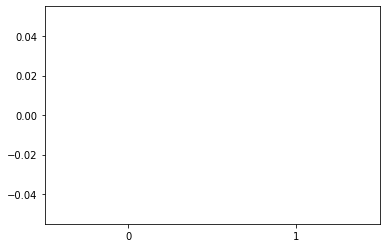

In [80]:
import matplotlib.pyplot as plt

d0 = df_csv[df_csv["DEATH_EVENT"] == "0"]
d1 = df_csv[df_csv["DEATH_EVENT"] == "1"]


plt.boxplot([d0['age'], d1['age']], labels = ["0", "1"])
plt.show()

In [81]:
from scipy.stats import ttest_ind

d0 = df_csv[df_csv["DEATH_EVENT"] == "0"]
d1 = df_csv[df_csv["DEATH_EVENT"] == "1"]

ttest_ind(d0['age'], d1['age'], equal_var=False, alternative='two-sided')

ttest_ind(d0['diabetes'], d1['diabetes'], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=nan, pvalue=nan)

In [96]:
features = df_csv.loc[:, df_csv.columns != "DEATH_EVENT"].to_numpy()
target = df_csv["DEATH_EVENT"]
target.shape

print(type(features))
target.shape

target.value_counts()

<class 'numpy.ndarray'>


0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    features, target, random_state=42, train_size = 0.7)



In [98]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [99]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(train_scaled, train_target)




LogisticRegression(max_iter=1000)

In [100]:
print(lr.predict(train_scaled[:10]))
print(train_target[:10])

[0 1 0 1 1 1 0 0 1 0]
224    0
68     1
222    0
37     1
16     1
119    1
268    0
269    0
67     1
101    0
Name: DEATH_EVENT, dtype: int64


In [101]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8803827751196173
0.7888888888888889


In [102]:
print(lr.predict_proba(train_scaled[:10]))

[[0.97112706 0.02887294]
 [0.18506979 0.81493021]
 [0.9925316  0.0074684 ]
 [0.43292307 0.56707693]
 [0.24336963 0.75663037]
 [0.14487278 0.85512722]
 [0.99218865 0.00781135]
 [0.99461122 0.00538878]
 [0.36371005 0.63628995]
 [0.75299369 0.24700631]]


array([[-2.37151460e-01, -8.52802865e-01,  7.23085196e-03,
         1.23210076e+00, -1.16176152e+00, -7.40370278e-01,
         2.66024825e+00, -3.73951222e-01,  2.97672325e-01,
         7.63762616e-01, -6.56891809e-01,  9.17167286e-01],
       [ 7.92465709e-01, -8.52802865e-01, -4.48525189e-01,
        -8.11621931e-01, -1.16176152e+00, -7.40370278e-01,
        -1.99304085e-01, -1.73474614e-01,  1.22623226e+00,
        -1.30930734e+00, -6.56891809e-01, -8.66991467e-01],
       [-1.60997435e+00,  1.17260394e+00, -5.29716883e-01,
        -8.11621931e-01, -2.95517646e-01, -7.40370278e-01,
         1.13148758e+00, -2.73712918e-01,  5.29812310e-01,
         7.63762616e-01,  1.52232070e+00,  8.65824588e-01],
       [ 1.82208288e+00,  1.17260394e+00,  3.02768617e-01,
         1.23210076e+00,  1.00384816e+00,  1.35067551e+00,
         6.47563336e-01, -3.73951222e-01,  1.92265222e+00,
        -1.30930734e+00, -6.56891809e-01, -1.32907575e+00],
       [ 2.25109003e+00,  1.17260394e+00, -4.6151586

In [103]:
print(lr.coef_, lr.intercept_)

[[ 0.66694321 -0.15856209  0.07104501  0.06112533 -0.84956613 -0.10121667
  -0.17884112  0.78432009 -0.25538471 -0.49135287  0.17534933 -1.69178659]] [-1.74317134]


In [104]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, train_input, train_target, cv = 5)
print(scores['test_score'])
print(scores['test_score'].mean())


[0.85714286 0.9047619  0.83333333 0.76190476 0.80487805]
0.8324041811846691


In [105]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))



1.0
0.6777777777777778


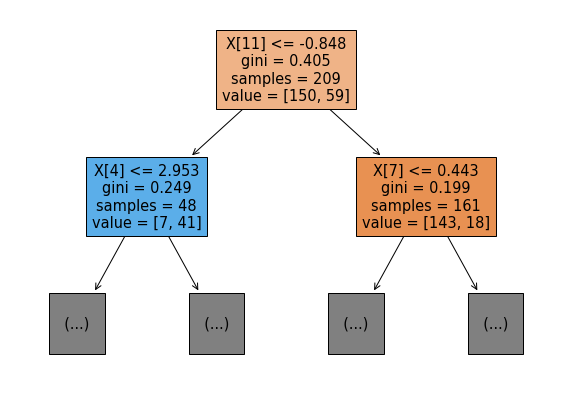

In [106]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True)

plt.show()

In [111]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9665071770334929
0.6888888888888889


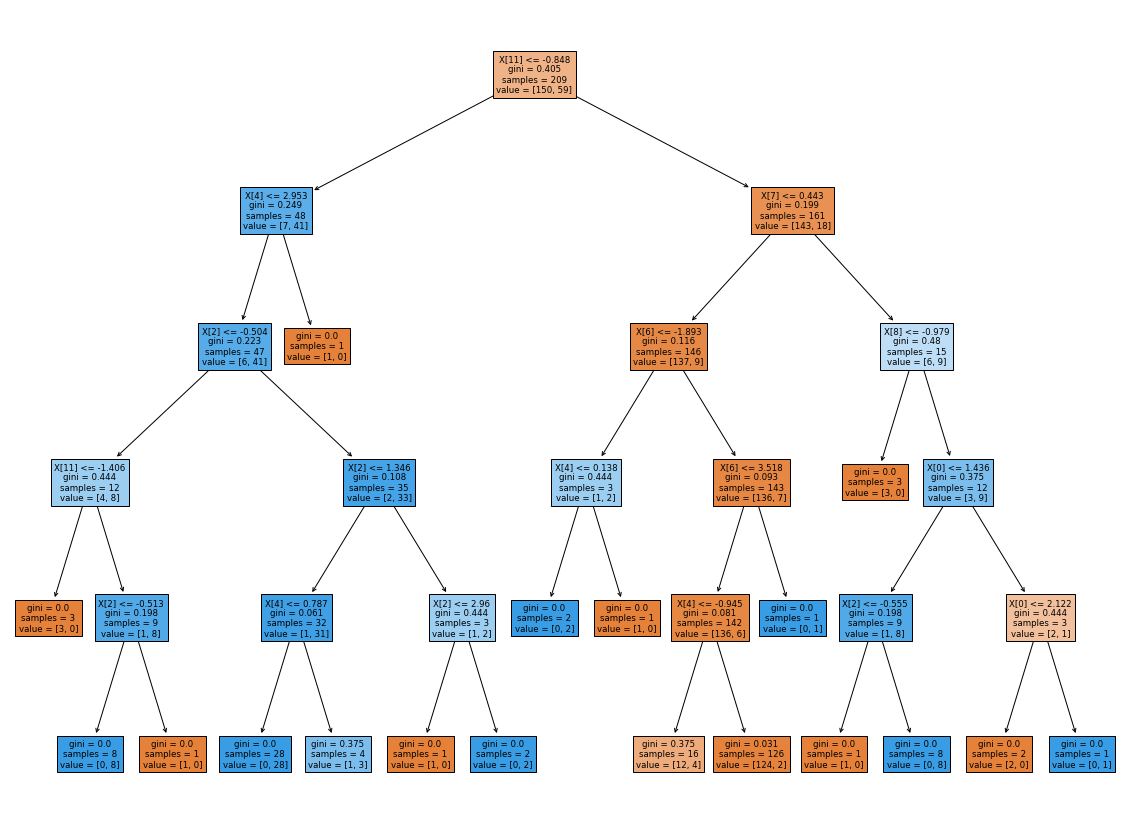

In [112]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True)
plt.show()

In [114]:
df_csv.columns[[11, 4, 7]]

Index(['time', 'ejection_fraction', 'serum_creatinine'], dtype='object')